In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

### 1. Business Problem

In the wake of big unstructured text data, Natural Language Processing or NLP and text analytics are on everyone’s radar. In short, NLP is the process of using artificial intelligence to understand the human language and text analysis uses NLP to carry out analysis. Whether its sentiment analysis or text mining there are multiple packages created to help data scientist and analyst along the way. Particularly in this project, we will be focused on text mining and will mostly be working with NLTK, Natural language toolkit and Regex, regular expression.Text mining includes data mining algorithms, NLP, machine learning, and statistical operations to derive useful content from unstructured formats.[5]

Part one of this project will be focused on text mining and keyword extraction news articles from the year 2020. Part two of the project will be geared more towards predictive analysis and model building. 

Business Problem: Using keyword extraction to identify NASDAQ licensing pair agreement(two NASDAQ companies noted in licensing agreement) from the year 2020 by mining news articles and build a predictive model to sort for licensing articles

### 2. Dataset Overview

The scope of the data revolves around news article from a variety of popular news outlets such as Wall Street Journal, New York Times, Pr Newswire, Business Wire and Dow Jones International News. 

* Pr Newswire, Business Wire, and Dow Jones International News have a total of 44258 articles that are represented as the rows and 2 features that are represented as the columns. The features are Document_id, and  Content. This is the main dataset we will be working with.

* Wall street Journal dataset has 1183 articles that are represented in the row of the dataset and 9 features that are represented as columns. The features are url, time, category, sub category1, sub category2, author, title, content, and year. 

* New York Times data has 1709 articles that are represented in the row of the dataset and 11 features that are represented as columns. The features are web_url, print_section, keywords, pub_date, document_type, section_name, subsection_name, title, clean_text, word_count_text, and year. 

Some of these features will not be needed and will be dropped during preprocessing. 


### 3. Import Data

In [2]:
# df_wsj - wallstreet journal 
# df_nyt - new york time
# df - *main dataset* pr newswire & dow jones

df_wsj = pd.read_excel('WSJ_licensing_2020.xlsx',index_col =0)
df_nyt = pd.read_excel('NYT_licensing_2020.xlsx', index_col = 0)
df = pd.read_excel('Licensing_2020.xlsx', index_col =0)

### 4. Explortory Data Analysis and Data Preprocessing 

Exploratory Data Analysis and Data Preprocessing are looped together in one step because they often overlap. Exploratory Data Analysis can often aid Preprocessing.

* Preprocessing and data cleaning is an essential part of building a project. At times can be tedious but is a very necessary step to ensure only quality data is used through-out our analysis. 

* Exploratory Data Analysis or EDA is the process of examining the data before any assumptions are made. This helps us get to know the data, identify any obvious errors, outliers, recognize any patterns in the data. EDA especially helps illustrate a large set of data quickly. 

Particularly with these datasets, we will drop unnecessary columns, extract date and year from text, clean content from news articles and remove stop-words. 

Word clouds is a popular text EDA that will provide as with a visual of the common words used through out our data. 


#### 4.0.1 Get shape and columns names for datasets 

In [3]:
df_nyt.shape

(1709, 11)

In [4]:
df_nyt.columns

Index(['web_url', 'print_section', 'keywords', 'pub_date', 'document_type',
       'section_name', 'subsection_name', 'title', 'clean_text',
       'word_count_text', 'year'],
      dtype='object')

In [5]:
df_wsj.shape

(1183, 9)

In [6]:
df_wsj.columns

Index(['url', 'time', 'category', 'sub category1', 'sub category2', 'author',
       'title', 'content', 'year'],
      dtype='object')

In [7]:
df.shape

(44258, 2)

In [8]:
df.columns

Index(['Document_id', 'Content'], dtype='object')

#### 4.0.2 Get info (datatypes) and view the top of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44258 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document_id  44258 non-null  object
 1   Content      44258 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [10]:
df.head()

,Document_id,Content
0,Document PRN0000020200130eg1u000hm,Mack Trucks Launches Mack(R) MD Series Medium-...
1,Document DJDN000020200130eg1u0025b,*Fitch Rtgs: Coal Exit Agreement Credit-Neutra...
2,Document DJDN000020200130eg1u00293,*Fitch Affirms Pitney Bowes' 'BB+' Long-Term I...
3,Document DJDN000020200130eg1u0022v,"Lilly, Incyte: Baricitinib Meets Mains Endpoin..."
4,Document BWR0000020200130eg1u0009a,Majesco To Report Fiscal 2020 Third Quarter Fi...


In [11]:
df_wsj['content'] = df_wsj['title']+ " " + df_wsj['content']
df_nyt['content'] = df_nyt['title']+ " " + df_nyt['clean_text']

#### 4.0.3 Drop unwanted columns 

In [12]:
df_wsj.drop(columns = ['category', 'sub category1', 'sub category2',
       'author', 'title'],inplace =True)

In [13]:
df_nyt.drop(columns = ['print_section', 'keywords',
       'document_type', 'section_name', 'subsection_name', 'title',
       'word_count_text','clean_text'], inplace = True) 

#### 4.0.4 Options to view full columns

This is helpful when trying to get a better idea of the content in the news articles

In [14]:
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.width', 80)

#### 4.0.5 Date Extraction

In [15]:
from datetime import datetime 
# Extracting date from document id
date_extraction = []

for i in df.Document_id:
    i = i.replace('Document ', '')
    date_i = datetime.strptime(i[8:16], "%Y%m%d").date()
    date_extraction.append(date_i)
df['Date'] = date_extraction
df.head(2)

,Document_id,Content,Date
0,Document PRN0000020200130eg1u000hm,Mack Trucks Launches Mack(R) MD Series Medium-...,2020-01-30
1,Document DJDN000020200130eg1u0025b,*Fitch Rtgs: Coal Exit Agreement Credit-Neutra...,2020-01-30


In [16]:
year_extraction = []


for datetime_ in df.Date:
    if datetime_ != []:
        year_ = datetime_.year
    else:
        year_ = []
    year_extraction.append(year_)
    
df['Year'] = year_extraction

#### 4.0.6 Cleaning Text

This stage is one of the most important in data cleaning. 

* 1- Identify and remove stop-words. Stop words is a term used in NLP when referring to commonly used words in text data. These are words they we see often in language but do not hold much useful information. Some example of these words are “a”, “the”, “is”, and “are”. Nltk has a list of pre-defined stop-words that is very help and used in this project 

* 2- User-defined text cleaning function. This is a function built by us, the user, to do something. This function is going to clean our text and is named clean text. It will lower all the text if the character is uppercase, it will remove all the punctuation, and remove all numbers in the text. 

This function will be applied to the content column of all dataframes. 

In [17]:
stopwords = set(nltk.corpus.stopwords.words('english'))
newwords = ["statements", "forwardlooking","net"]
stopwords = stopwords.union(newwords)

def clean_text(text):
    '''Make text lowercase, remove punctuation, remove numbers'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'[0-9]+', '', text)
    return text



df['Content'] = df.Content.apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
df_nyt['content'] = df_nyt.content.apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
df_wsj['content'] = df_wsj.content.apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))


In [18]:
df['content_clean'] = df.Content.apply(clean_text)
df_wsj['content_clean'] = df_wsj.content.apply(clean_text)
df_nyt['content_clean'] = df_nyt.content.apply(clean_text)

#### 4.0.7 Viusal EDA

In this section, the dataset will be filtered for key terms to most likely be found in licensing agreement news articles. Then for some EDA, we will an average amount of time the licensing term appears before then filter and then after. 

For the filtered data, a new dataframe will be created named df2.

In [19]:
df.head()

,Document_id,Content,Date,Year,content_clean
0,Document PRN0000020200130eg1u000hm,Mack Trucks Launches Mack(R) MD Series Medium-...,2020-01-30,2020,mack trucks launches mackr md series mediumdut...
1,Document DJDN000020200130eg1u0025b,*Fitch Rtgs: Coal Exit Agreement Credit-Neutra...,2020-01-30,2020,fitch rtgs coal exit agreement creditneutral e...
2,Document DJDN000020200130eg1u00293,*Fitch Affirms Pitney Bowes' 'BB+' Long-Term I...,2020-01-30,2020,fitch affirms pitney bowes bb longterm idr wit...
3,Document DJDN000020200130eg1u0022v,"Lilly, Incyte: Baricitinib Meets Mains Endpoin...",2020-01-30,2020,lilly incyte baricitinib meets mains endpoints...
4,Document BWR0000020200130eg1u0009a,Majesco To Report Fiscal 2020 Third Quarter Fi...,2020-01-30,2020,majesco to report fiscal third quarter financ...


#### 4.0.7a Prefilter word cloud 

In [20]:
## average time licensing agreement appears across full content column - 3percent 
print("Licensing count: ",sum(df.Content.str.contains('licensing agreement'))/len(df))
# text
text = df.Content
#print(text)


Licensing count:  0.032807627999457724


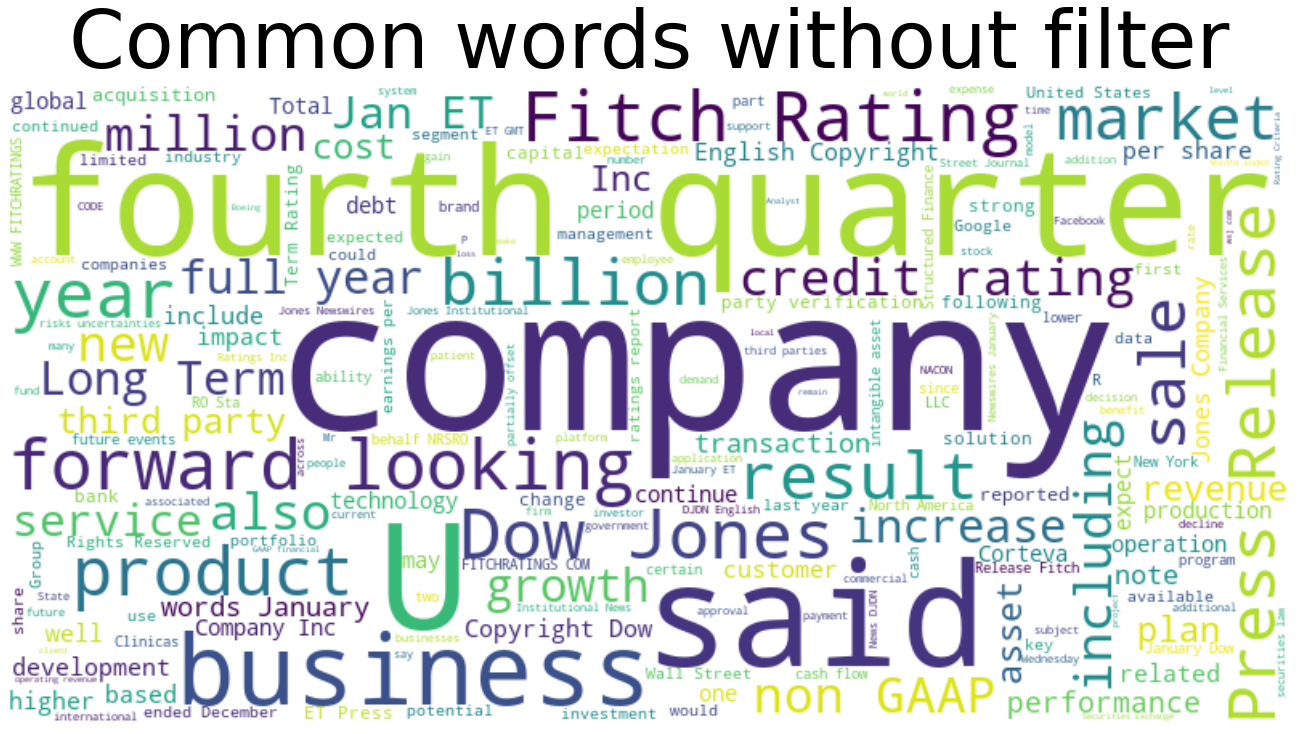

In [21]:


words = df['Content']
mostcommon = FreqDist(words).most_common(100)
wordcloud = WordCloud(stopwords = stopwords,width=800, height=400, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Common words without filter', fontsize=80)
plt.tight_layout(pad=0)
plt.show()

#### 4.0.7b Keywords used in our licensing filter

Filter all three dataframes on keywords commonly found in licensing pair articles

In [22]:
license_list = ['licensing agreement', 'licensee','licensor']



df2 =  df.loc[df.Content.str.contains("|".join(license_list) ,case=False)]
df_nyt2 =  df_nyt.loc[df_nyt.content.str.contains("|".join(license_list) ,case=False)]
df_wsj2 =  df_wsj.loc[df_wsj.content.str.contains("|".join(license_list) ,case=False)]

#### 4.0.7c Word cloud with filter

In [23]:
### average time licensing agreement appears across filtered content column - 60percent

print("Licensing count: ",sum(df2.Content.str.contains('licensing agreement'))/len(df2))
# text
text = df2.Content
#print(text)


Licensing count:  0.5752773375594294


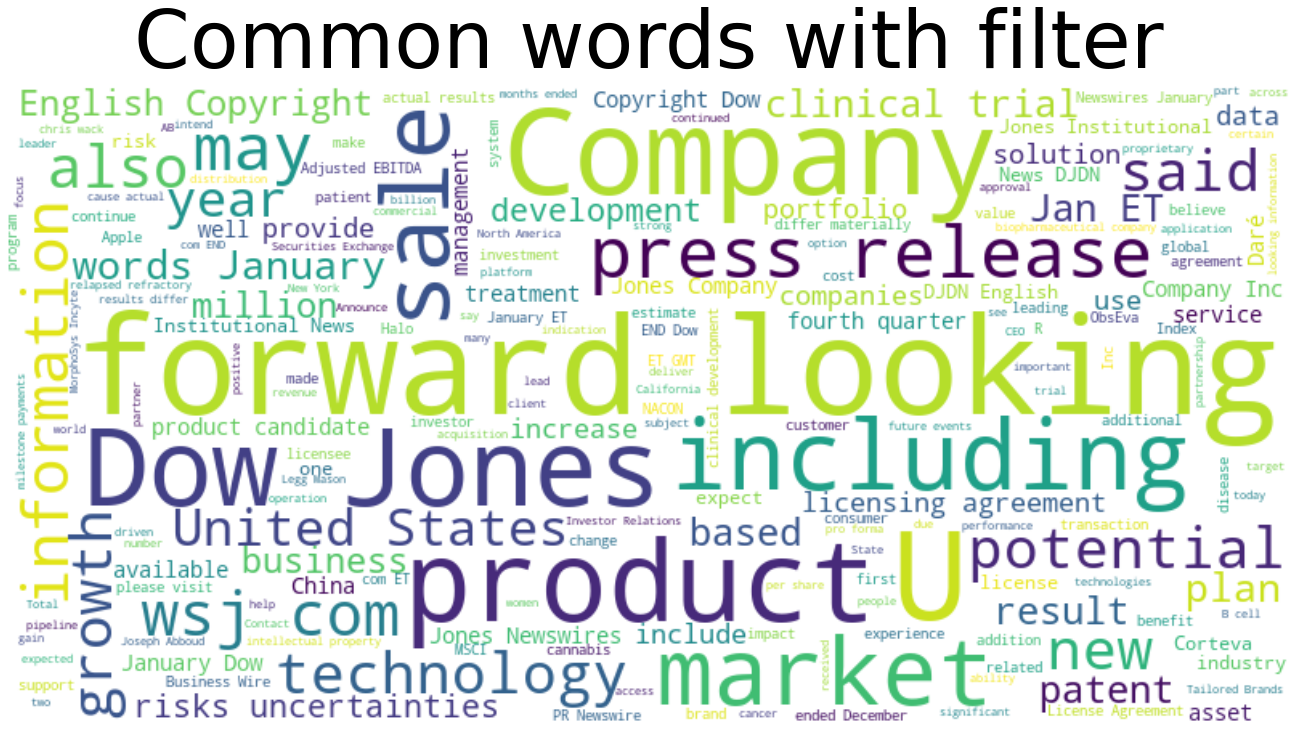

In [24]:
words = df2['Content']
mostcommon = FreqDist(words).most_common(100)
wordcloud = WordCloud(stopwords = stopwords,width=800, height=400, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Common words with filter', fontsize=80)
plt.tight_layout(pad=0)
plt.show()

#### 4.0.7d Dataframe shape

In [25]:
df2.shape

(2524, 5)

#### 4.0.7e Dataframe data types

In [26]:
df2.dtypes

Document_id      object
Content          object
Date             object
Year              int64
content_clean    object
dtype: object

#### 4.0.7f Most common words in dataframe

In [27]:
common = pd.Series(' '.join(df2['Content']).split()).value_counts()[:35]
print(common)

--                 25529
2020               19984
The                18343
million            10710
$                   8512
Inc.                7374
forward-looking     6962
including           6888
clinical            6548
-                   6523
Company             6294
development         6201
quarter             6166
may                 6004
results             5954
&                   5830
2019                5710
ET                  5545
Company's           5528
2020,               5269
Dow                 5213
Jones               5159
financial           5106
In                  5047
product             5031
new                 5021
company             4893
patients            4797
information         4501
income              4428
U.S.                4423
sales               4330
Phase               4308
per                 4223
products            4219
dtype: int64


#### 4.0.7f Least common words in dataframe

In [28]:
uncommon =  pd.Series(' '.join(df['Content']).split()).value_counts()[:20]
uncommon


The            410364
Fitch          401707
2020           262244
rating         220207
--             198250
ratings        169248
information    166517
credit         144865
million        122861
Rating         106328
Inc.           102763
financial       99524
In              95100
may             94842
Dow             83846
Jones           83131
including       82222
-               81071
AND             77907
U.S.            77876
dtype: int64

### 5. Ticker Extraction 

In this next we will beginning text mining by extracting meaningful information from the news articles. For this project, the licensing pairs should be a Nasdaq company from the year 2020. In a separate dataframe, there is a list of all the publicly traded nasdaq companies from 2020. Later in the project, this dataframe will be used to cross reference with these extractions. 

**First, what is a ticker**? 

"A ticker symbol or stock symbol is an abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market." - The Balance


During our EDA, tickers appears in a couple of different patterns. The appear in parentheses usually after a stock market name. Through a user defined function and regex, regular expression, a new column will be created identifying these tickers.

#### 5.0.1 Ticker Extraction Preprocessing

In [29]:
# Ticker Extraction
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('omw-1.4')
def preprocessing2(text):
    
    # Adding exclusion list 
    exclude_list = ['GLOBENEWSWIE','BUSINESS WIRE', 'SEC', 'TM', 'R&D', 'G&A', 'U.S.','FDA', 'GMT', 'END', 'GPS', 'EU', 'Dow Jones', 'Dow Jones & Company', 'Copyright (c)', 'Inc.', 'PR Newswire', 'ENTERTAINMENT WIRE']
    for exclude_word in exclude_list:
        text = text.replace(exclude_word, '')
        
    # tokenization
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]



    # lemmatization
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ''.join(tokens) 
    
    return preprocessed_text

[nltk_data] Downloading package wordnet to /Users/sofia2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sofia2/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
df2['content_clean_2'] = df2['Content'].apply(lambda x: preprocessing2(x))

/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/3327817647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['content_clean_2'] = df2['Content'].apply(lambda x: preprocessing2(x))


In [31]:
df2.head()

,Document_id,Content,Date,Year,content_clean,content_clean_2
44,Document DJDN000020200130eg1u001c4,*Corteva Agriscience Accelerate Ramp Up Enlist...,2020-01-30,2020,corteva agriscience accelerate ramp up enlist ...,*CortevaAgriscienceAccelerateRampUpEnlistE3Soy...
48,Document DJDN000020200130eg1u00171,Press Release: Corteva Reports Fourth Quarter ...,2020-01-30,2020,press release corteva reports fourth quarter f...,PressRelease:CortevaReportsFourthQuarterFullYe...
78,Document DJDN000020200130eg1u000hd,Press Release: PRESS RELEASE: BIGBEN AND NACON...,2020-01-30,2020,press release press release bigben and nacon a...,PressRelease:PRESSRELEASE:BIGBENANDNACONANNOUN...
80,Document DJDN000020200130eg1u000c3,Press Release: Roche reports strong results 20...,2020-01-30,2020,press release roche reports strong results w...,"PressRelease:Rochereportstrongresult20193,434w..."
86,Document DJDN000020200129eg1t0016y,Press Release: Verastem Oncology Announces Dos...,2020-01-29,2020,press release verastem oncology announces dosi...,PressRelease:VerastemOncologyAnnouncesDosingFi...


#### 5.0.2 Ticker extraction function and column

In [32]:
# Ticker Extraction
def ticker_extraction(text):
    
    # patterns
    pt1 = r"\(Nasdaq:\s*(.+?)\)"
    pt2 = r"\(NASDAQ:\s*(.+?)\)"
    pt3 = r"\(Nasdaq\s*National\s*Market:\s*(.+?)\)"
    pt4 = r"\(NASDAQ\s*CM:\s*(.+?)\)"
    pt5 = r"\(;\s*NASDAQ:\s*(.+?)\)"
    pt6 = r"\(:\s*Nasdaq:\s*(.+?)\)"
    pt7 = r"\(NASDAQGS:\s*(.+?)\)"
    
    pt8 = r"\(NYSE:\s*(.+?)\)"
    pt9 = r"\(Nyse:\s*(.+?)\)"
    pt10 = r"\(NYSE\s*American:\s*(.+?)\)"
    
    pt11 = r"\(\s*(.+?)\)"
    
    pt12 = r"\(OTC:\s*(.+?)\)"
    pt13 = r"\(OTCQB\s*(.+?)\)"
    pt14 = r"\(OTCQB:\s*(.+?)\)"
    pt15 = r"\(OTCQX:\s*(.+?)\)"
    
    pt16 = r"\(AMEX:\s*(.+?)\)"
    pt17 = r"\(CSE:\s*(.+?)\)"
    pt18 = r"\(SIX:\s*(.+?)\)"
    pt19 = r"\(SWX:\s*(.+?)\)"
    pt20 = r"\(FSE:\s*(.+?)\)"
    
   
    ticker_1 = re.findall(pt1, text) 
    ticker_2 = re.findall(pt2, text) 
    ticker_3 = re.findall(pt3, text) 
    ticker_4 = re.findall(pt4, text) 
    ticker_5 = re.findall(pt5, text) 
    ticker_6 = re.findall(pt6, text) 
    ticker_7 = re.findall(pt7, text) 
    ticker_8 = re.findall(pt8, text) 
    ticker_9 = re.findall(pt9, text)
    ticker_10 = re.findall(pt10, text) 
    ticker_11 = re.findall(pt11, text) 
    ticker_12 = re.findall(pt12, text) 
    ticker_13 = re.findall(pt13, text) 
    ticker_14 = re.findall(pt14, text) 
    ticker_15 = re.findall(pt15, text) 
    ticker_16 = re.findall(pt16, text) 
    ticker_17 = re.findall(pt17, text) 
    ticker_18 = re.findall(pt18, text) 
    ticker_19 = re.findall(pt19, text)
    ticker_20 = re.findall(pt20, text) 
    
    ticker_all = set(ticker_1 + ticker_2 + ticker_3 + ticker_4 + ticker_5 + ticker_7 + ticker_8 + ticker_9 + ticker_10 + ticker_11 + ticker_12 + ticker_13 + ticker_14 + ticker_15 + ticker_16 + ticker_17 + ticker_18 + ticker_19 + ticker_20)

    return ticker_all

In [33]:
def ticker_extractor(text):
    
    tickers_potential = ticker_extraction(text) 
    tickers_potential_list = list(tickers_potential)
    
    tickers_upper = []
    
    for tick in tickers_potential_list:
        if tick.isalpha() == True:
            tickers_upper.append(tick.isupper())
        else:
            tickers_upper.append(False)
            
    tst = [i for i,x in enumerate(tickers_upper) if x == True]
    tickers = [tickers_potential_list[j] for j in tst]
    if 'R' in tickers:
        tickers.remove('R')
    if 'TM' in tickers:
        tickers.remove('TM')
    return tickers

In [34]:
possible_tickers_list = []

for row in df2.itertuples():
    text = row.content_clean_2
    tickers = ticker_extractor(text)
    possible_tickers_list.append(tickers)
df2['possible_tickers'] = possible_tickers_list  

/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/2986762435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['possible_tickers'] = possible_tickers_list


In [35]:
df2.head()

,Document_id,Content,Date,Year,content_clean,content_clean_2,possible_tickers
44,Document DJDN000020200130eg1u001c4,*Corteva Agriscience Accelerate Ramp Up Enlist...,2020-01-30,2020,corteva agriscience accelerate ramp up enlist ...,*CortevaAgriscienceAccelerateRampUpEnlistE3Soy...,[CTVA]
48,Document DJDN000020200130eg1u00171,Press Release: Corteva Reports Fourth Quarter ...,2020-01-30,2020,press release corteva reports fourth quarter f...,PressRelease:CortevaReportsFourthQuarterFullYe...,"[AT, OPEB, SM, CTVA, EPS]"
78,Document DJDN000020200130eg1u000hd,Press Release: PRESS RELEASE: BIGBEN AND NACON...,2020-01-30,2020,press release press release bigben and nacon a...,PressRelease:PRESSRELEASE:BIGBENANDNACONANNOUN...,"[AMF, COO, SIE, CEO]"
80,Document DJDN000020200130eg1u000c3,Press Release: Roche reports strong results 20...,2020-01-30,2020,press release roche reports strong results w...,"PressRelease:Rochereportstrongresult20193,434w...","[SMA, DJSI, CHF, NMOSD, PPMS, RMS, NTRK, TNBC,..."
86,Document DJDN000020200129eg1t0016y,Press Release: Verastem Oncology Announces Dos...,2020-01-29,2020,press release verastem oncology announces dosi...,PressRelease:VerastemOncologyAnnouncesDosingFi...,"[CSPC, SLL, PTCL, FL, CLL, VS, MORETOFOLLOW]"


### 6. Keyword extraction

In this section, we will use keyword extraction to retrieve meaningful from the text.

**What is keyword extraction**? 

For the purpose of this project, keyword extraction is an automated way to retrieve key phases or terms that hold strong relevance to the content of the document.


**Supervised keyword extraction** -  is formulated as a binary classification problem, where candidate phrases are classified as either positive (i.e., keyphrases) or negative (i.e.,non-keyphrases).[1] It is said that supervised methods perform better than unsupervised, however, this requires a lot of human annotation. 


**Unsupervised keyword extraction** - is formulated as a ranking problem with graph-based ranking techniques being considered state-of-the-art (Hasan and Ng, 2014). These graph-based techniques construct a word graph from each target document, such that nodes correspond to words and edges correspond to word association patterns.[1] Others use embeddings of other NLP models or adjunct their unsupervised method with established corpus from existing libraries. 


#### 6.0.1 Extractions methods used 

When it comes to extraction of keywords, to major factors come into play time and substance. Some algorithms may work much faster than others but their contextual relevance is much lower than others. Ideally, the perfect algorithm so the best of both world. We will look into 6 different methods and figure out the most appropriate one.

1. Rake, short for Rapid Automatic Keyword Extraction algorithm, uses frequency and co-occurance for extraction. It uses NTLK for implantation. It has a simple interface and generates results quickly. 

2. Yake is unsupervised approach for automatic keyword extraction using text features. It does not use a dictionary or thesaurus for training but uses an unsupervised approach that build when extracting feature from the text. This makes this system easier to use with new languages as well. 

3. KeyBERT is keyword extraction technique that leverages BERT embeddings to create keywords and keyphrases that are most similar to a document. KeyBERT works first by extraction document-level embeddings using BERT. This means it recognizes the relationship between two entities. Then embeddings are extracted for N-gram words or phrases. Lastly, cosine similarity is apply to better identify the terms relevance to each other and the document. 

4. PKE is an open-source python-based keyword and keyphrase extraction library. PKE helps the implementation of the following graph based models. 
    * Position Rank algorithm involves three essential steps: 1- the graph construction at word level; a 2- the design of Position-Biased PageRank; and 3- the formation of candidate phrases.[1]
    
    * Single Rank is implemented by first employing the clustering algorithm to obtain appropriate document clusters, and then using the graph-based ranking algorithm for collaborative single-document keyphrase extraction within each cluster.[2]
    
    * Multipartite Rank is an unsupervised keyphrase extraction model that encodes topical information within a multipartite graph structure. The model represents keyphrase candidates and topics in a single graph and exploits their mutually reinforcing relationship to improve candidate ranking.[3]
    
    * Topic Rank a graph-based keyphrase extraction method that relies on a topical representation of the document. Candidate keyphrases are clustered into topics and used as vertices in a complete graph. A graph-based ranking model is applied to assign a significance score to each topic. Keyphrases are then generated by selecting a candidate from each of the topranked topics.[4]
    
Code source: https://towardsdatascience.com/keyword-extraction-a-benchmark-of-7-algorithms-in-python-8a905326d93f

In [48]:
## import keyword extraction libraries 

from rake_nltk import Rake
from keybert import KeyBERT

# initiate BERT outside of functions
bert = KeyBERT()

# 1. RAKE
def rake_extractor(text):
    """
    Uses Rake to extract the top 25 keywords from a text
    Arguments: text (str)
    Returns: list of keywords (list)
    """
    r = Rake()
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()[:25]

## yake keyword installer


! pip install git+https://github.com/LIAAD/yake
    
import yake

def yake_extractor(text):
    """
    Uses YAKE to extract the top 5 keywords from a text
    Arguments: text (str)
    Returns: list of keywords (list)
    """
    keywords = yake.KeywordExtractor(lan="en", n=3, windowsSize=3, top=20).extract_keywords(text)
    results = []
    for scored_keywords in keywords:
        for keyword in scored_keywords:
            if isinstance(keyword, str):
                results.append(keyword) 
    return results 

def keybert_extractor(text):
    """
    Uses KeyBERT to extract the top keywords from a text
    Arguments: text (str)
    Returns: list of keywords (list)
    """
    keywords = bert.extract_keywords(text, keyphrase_ngram_range=(3, 25), stop_words="english", top_n=25)
    results = []
    for scored_keywords in keywords:
        for keyword in scored_keywords:
            if isinstance(keyword, str):
                results.append(keyword)
    return results 

import pke

def position_rank_extractor(text):
    """
    Uses PositionRank to extract the top 25 keywords from a text
    Arguments: text (str)
    Returns: list of keywords (list)
    """
    # define the valid Part-of-Speeches to occur in the graph
    pos = {'NOUN', 'PROPN', 'ADJ', 'ADV'}
    extractor = pke.unsupervised.PositionRank()
    extractor.load_document(text, language='en')
    extractor.candidate_selection(pos=pos, maximum_word_number=25)
    # 4. weight the candidates using the sum of their word's scores that are
    #    computed using random walk biaised with the position of the words
    #    in the document. In the graph, nodes are words (nouns and
    #    adjectives only) that are connected if they occur in a window of
    #    3 words.
    extractor.candidate_weighting(window=3, pos=pos)
    # 5. get the 25-highest scored candidates as keyphrases
    keyphrases = extractor.get_n_best(n=25)
    results = []
    for scored_keywords in keyphrases:
        for keyword in scored_keywords:
            if isinstance(keyword, str):
                results.append(keyword) 
    return results 

# 4. SingleRank
def single_rank_extractor(text):
    """
    Uses SingleRank to extract the top 25 keywords from a text
    Arguments: text (str)
    Returns: list of keywords (list)
    """
    pos = {'NOUN', 'PROPN', 'ADJ', 'ADV'}
    extractor = pke.unsupervised.SingleRank()
    extractor.load_document(text, language='en')
    extractor.candidate_selection(pos=pos)
    extractor.candidate_weighting(window=3, pos=pos)
    keyphrases = extractor.get_n_best(n=25)
    results = []
    for scored_keywords in keyphrases:
        for keyword in scored_keywords:
            if isinstance(keyword, str):
                results.append(keyword) 
    return results 

# 5. MultipartiteRank
def multipartite_rank_extractor(text):
    """
    Uses MultipartiteRank to extract the top 25 keywords from a text
    Arguments: text (str)
    Returns: list of keywords (list)
    """
    extractor = pke.unsupervised.MultipartiteRank()
    extractor.load_document(text, language='en')
    pos = {'NOUN', 'PROPN', 'ADJ', 'ADV'}
    extractor.candidate_selection(pos=pos)
    # 4. build the Multipartite graph and rank candidates using random walk,
    #    alpha controls the weight adjustment mechanism, see TopicRank for
    #    threshold/method parameters.
    extractor.candidate_weighting(alpha=1.1, threshold=0.74, method='average')
    keyphrases = extractor.get_n_best(n=25)
    results = []
    for scored_keywords in keyphrases:
        for keyword in scored_keywords:
            if isinstance(keyword, str):
                results.append(keyword) 
    return results

# 6. TopicRank
def topic_rank_extractor(text):
    """
    Uses TopicRank to extract the top 25 keywords from a text
    Arguments: text (str)
    Returns: list of keywords (list)
    """
    extractor = pke.unsupervised.TopicRank()
    extractor.load_document(text, language='en')
    pos = {'NOUN', 'PROPN', 'ADJ', 'ADV'}
    extractor.candidate_selection(pos=pos)
    extractor.candidate_weighting()
    keyphrases = extractor.get_n_best(n=25)
    results = []
    for scored_keywords in keyphrases:
        for keyword in scored_keywords:
            if isinstance(keyword, str):
                results.append(keyword) 
    return results


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Cloning https://github.com/LIAAD/yake to /private/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/pip-req-build-udv1lzv8
  Running command git clone -q https://github.com/LIAAD/yake /private/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/pip-req-build-udv1lzv8
  Resolved https://github.com/LIAAD/yake to commit 4f82feb2dfcf1a313621ecf6e4b2eeda6035d73c


In [37]:
import logging
import time 
from tqdm import tqdm 
def extract_keywords_from_corpus(extractor, corpus):
    """This function uses an extractor to retrieve keywords from a list of documents"""
    extractor_name = extractor.__name__.replace("_extractor", "")
    #logging.info(f"Starting keyword extraction with {extractor_name}")
    corpus_kws = {}
    start = time.time()
    logging.info(f"Timer initiated.")# <-- uncomment this if you want to output start of timer
    for idx, text in tqdm(enumerate(corpus), desc="Extracting keywords from corpus..."):
        corpus_kws[idx] = extractor(text)
    end = time.time()
    #logging.info(f"Timer stopped.")# <-- uncomment this if you want to output end of timer
    elapsed = time.strftime("%H:%M:%S", time.gmtime(end - start))
    logging.info(f"Time elapsed: {elapsed}")
    
    return {"algorithm": extractor.__name__, 
            "elapsed_time": elapsed}


### Test Extractors 

In [38]:
text = df2.loc[0,'content_clean']
text =str(text)

In [39]:
# 1. RAKE
rake = rake_extractor(text)
extract_keywords_from_corpus(rake_extractor, text)
print(rake)

Extracting keywords from corpus...: 2014it [00:00, 8370.95it/s]

['... 0 press release morphosys imab announce fda clea ... 0 vanderbilt mortgage releases digital homeowner ... 0 oncopep strengthens pipeline addition multitum ... 0 united states noninvasive prenatal testing mar ... 0 neta announces security equipment grant progra ... 0 press release silo pharma inc announces filing ... 0 mattel names jonathan anschell executive vice ... 0 lantheus holdings announces fda clearance aien ... 0 business business spotify strikes new deal war ... 0 press release moderna reports first quarter f ... 0 press release gildan publishes genuine respon ... 0 press release brainstorm cell therapeutics ann ... 0 hk bourse announcement', '... 0 press release synthetic biologics announces ac ... 0 press release adocia announces full year fina ... 0 press release valneva pfizer announce collabor ... 0 general electric sell lighting business savant ... 0 press release hookipa pharma reports first qua ... 0 legend biotech noileimmune biotech announce co ... 0 press rele

In [40]:
# 2. Yake
yake = yake_extractor(text)
    
print(yake)

['press release', 'press', 'release', 'press release lidds', 'announces', 'press release synthetic', 'press release adocia', 'release lidds', 'press release valneva', 'press release investor', 'press release hookipa', 'press release codexis', 'business', 'press release morphosys', 'press release silo', 'press release moderna', 'press release gildan', 'press release brainstorm', 'press release alimentation', 'press release aqua', 'release adocia announces', 'announce', 'release synthetic biologics', 'reports', 'business business']


In [41]:
    
# 3. KeyBERT
key = keybert_extractor(text)
extract_keywords_from_corpus(keybert_extractor, text)
print(key)


Extracting keywords from corpus...: 2014it [00:00, 3840.26it/s]

['press release cinotop electronics complete udhi acquires worldwide rights breakthrough press release morphosys imab announce fda clea vanderbilt mortgage releases digital homeowner oncopep strengthens pipeline', 'release cinotop electronics complete udhi acquires worldwide rights breakthrough press release morphosys imab announce fda clea vanderbilt mortgage releases digital homeowner oncopep strengthens pipeline addition', 'release cinotop electronics complete udhi acquires worldwide rights breakthrough press release morphosys imab announce fda clea vanderbilt mortgage releases digital homeowner oncopep strengthens pipeline', 'cinotop electronics complete udhi acquires worldwide rights breakthrough press release morphosys imab announce fda clea vanderbilt mortgage releases digital homeowner oncopep strengthens pipeline', 'cinotop electronics complete udhi acquires worldwide rights breakthrough press release morphosys imab announce fda clea vanderbilt mortgage releases digital homeow

In [42]:
#4. SingleRank
single_rank = single_rank_extractor(text)


print(single_rank)

['press release silo pharma inc announces filing', 'press release morphosys imab announce fda clea', 'press release ww announces second quarter', 'press release hookipa pharma reports first qua', 'press release valneva pfizer announce collabor', 'press release investor alert kaplan fox announ', 'press release moderna reports first quarter', 'press release codexis reports first quarter', 'press release brainstorm cell therapeutics ann', 'press release alimentation couchetard', 'press release synthetic biologics', 'press release aqua metals', 'press release adocia', 'press release gildan', 'press release', 'vanderbilt mortgage releases digital homeowner', 'mattel names jonathan anschell executive vice', 'united states noninvasive prenatal testing mar', 'general electric sell lighting business savant', 'halo enters partnership flowershop geazy', 'shareholder alert weisslaw llp', 'hk bourse announcement', 'security equipment grant progra', 'legend biotech noileimmune biotech', 'united stat

In [43]:
# 5. MultipartiteRank
multipartite_rank = multipartite_rank_extractor(text)
print(multipartite_rank)


['press release', 'schall law fir', 'shareholder alert weisslaw llp', 'rexn', 'communications services flat', 'business business', 'investors', 'new deal war', 'shareholder action', 'udhi', 'strategic transformation defini', 'worldwide rights', 'coty', 'full year', 'fda clearance aien', 'security equipment grant progra', 'neta', 'foreclosure filings', 'lantheus holdings', 'fina', 'deal', 'signs', 'fir', 'universal', 'vanderbilt mortgage releases digital homeowner']


In [44]:
# 6. TopicRank
topic_rank = topic_rank_extractor(text)

print(topic_rank)

['press release', 'schall law fir', 'new deal war', 'business business', 'foreclosure filings', 'signs', 'universal', 'communications services flat', 'shareholder alert weisslaw llp', 'investors', 'properties', 'new licensin', 'rexn', 'strategic transformation defini', 'word', 'full year', 'halo enters partnership flowershop geazy', 'fda clearance aien', 'vanguard launches', 'shareholder action', 'udhi', 'corporate bond etf', 'wynn macau ltd', 'second qua', 'worldwide rights']


In [45]:
# 7. PKE 
position_rank = position_rank_extractor(text)
print(position_rank)

['press release silo pharma inc announces filing', 'press release morphosys imab announce fda clea', 'press release valneva pfizer announce collabor', 'press release hookipa pharma reports', 'press release ww announces', 'press release codexis reports', 'press release moderna reports', 'press release investor alert kaplan fox announ', 'press release brainstorm cell therapeutics ann', 'press release alimentation couchetard', 'press release aqua metals', 'press release adocia', 'press release gildan', 'press release', 'vanderbilt mortgage releases digital homeowner', 'united states patent t', 'legend biotech noileimmune biotech', '0', 'united states', 'noninvasive prenatal testing mar', 'general electric sell lighting business savant', 'hk bourse announcement', 'synthetic biologics', 'first quarter', 'shareholder alert weisslaw llp']


#### 6.0.2 Initial analysis of extractors 

The KeyBERT extractor provides the most meaningful key phrases returned. However, it had a very long execution time. The scope of out dataframe in over 2,000 articles with many articles to have over 500 words. This might not be the most pracitical approach based on the time frame. Rake was by far the fastest. Yake seems to provide meanful keywords returned much faster. Also, single rank also provided decent results. We will execute these below. 

We did apply the keyBERT extractor to the content for just the first 500 rows and pickled that data. We will unpickle the data and see how it compares. 

#### 6.0.3 Create Rake keywords column

In [46]:
#rake keywords
df2['rake_key'] = df2['content_clean'].apply(lambda x: rake_extractor(str(x)))

/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/67965475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rake_key'] = df2['content_clean'].apply(lambda x: rake_extractor(str(x)))


#### 6.0.4 Create Yake keywords column

In [49]:
#adding yake keyword extraction column
df2['yake_keywords'] = df2['content_clean'].apply(lambda x : yake_extractor(str(x)))


/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/2543059504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['yake_keywords'] = df2['content_clean'].apply(lambda x : yake_extractor(str(x)))


#### 6.0.5 Create Single Rank keyword column

In [50]:
#adding yake keyword extraction column
df2['single_rank_keywords'] = df2['content_clean'].apply(lambda x : single_rank_extractor(str(x)))


/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/3717306861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['single_rank_keywords'] = df2['content_clean'].apply(lambda x : single_rank_extractor(str(x)))


#### 6.0.6 compare columns 

In [51]:
#compare columns
df2.head()

,Document_id,Content,Date,Year,content_clean,content_clean_2,possible_tickers,rake_key,yake_keywords,single_rank_keywords
44,Document DJDN000020200130eg1u001c4,*Corteva Agriscience Accelerate Ramp Up Enlist...,2020-01-30,2020,corteva agriscience accelerate ramp up enlist ...,*CortevaAgriscienceAccelerateRampUpEnlistE3Soy...,[CTVA],[enlist etm soybeans us canadian farmers pr ne...,"[enlist etm soybeans, weed control system, enl...",[corteva agriscience corteva inc nyse ctva pub...
48,Document DJDN000020200130eg1u00171,Press Release: Corteva Reports Fourth Quarter ...,2020-01-30,2020,press release corteva reports fourth quarter f...,PressRelease:CortevaReportsFourthQuarterFullYe...,"[AT, OPEB, SM, CTVA, EPS]",[effect competition consolidation cortevas ind...,"[pro forma operating, share common stock, amer...",[effect disruptions cortevas supply chain info...
78,Document DJDN000020200130eg1u000hd,Press Release: PRESS RELEASE: BIGBEN AND NACON...,2020-01-30,2020,press release press release bigben and nacon a...,PressRelease:PRESSRELEASE:BIGBENANDNACONANNOUN...,"[AMF, COO, SIE, CEO]",[forwardlooking made date press release group ...,"[financial markets authority, release press re...",[transaction favourable market conditions alai...
80,Document DJDN000020200130eg1u000c3,Press Release: Roche reports strong results 20...,2020-01-30,2020,press release roche reports strong results w...,"PressRelease:Rochereportstrongresult20193,434w...","[SMA, DJSI, CHF, NMOSD, PPMS, RMS, NTRK, TNBC,...",[study results announced fourth quarter study ...,"[approved chf billion, diagnostics division sa...",[roche cancer drugs china strong sales hercept...
86,Document DJDN000020200129eg1t0016y,Press Release: Verastem Oncology Announces Dos...,2020-01-29,2020,press release verastem oncology announces dosi...,PressRelease:VerastemOncologyAnnouncesDosingFi...,"[CSPC, SLL, PTCL, FL, CLL, VS, MORETOFOLLOW]",[copiktra duvelisib copiktra oral inhibitor ph...,"[relapsed refractory follicular, refractory fo...",[commercialize verastem oncologys copiktra tre...


In [52]:
df2.shape

(2524, 10)

#### 6.0.7 Unpickle keyBERT data

We ran the keybert function in colab to free processing time on the internal machine.

In [53]:
keybert = pd.read_pickle("./keybert_500.pkl")

In [54]:
keybert.head()

,Content,keywords_bert
44,corteva agriscience to accelerate ramp up of e...,"[farmers 2021 356 words, identified use words ..."
48,press release corteva reports fourth quarter a...,"[institutional news djdn english, year 2019 re..."
78,press release press release bigben and nacon a...,[nacon registration document financial markets...
80,press release roche reports very strong result...,"[strong results 2019 434 words, english copyri..."
86,press release verastem oncology announces dosi...,"[verification description clinical, informatio..."


### 7. Keyword and ticker extraction analysis

In this section, all of the componts will be brought together for our analysis. 

1. We are going to read in the ticker vaildation file. This is a file with a list of all the Nasdaq companies at the end of the year 2020. 

2. The ticker dataframe will be quickly cleaned.

3. The two of the ticker columns will be converted into list and will be ran against the content and keywords columns in our main dataframe and then the content columns in our NYT and WSJ dataframes.

4. This columns will be used to identify licensing pairs and aid human vaildation later on. 




#### 7.0.1 Read in ticker excel file

In [55]:
df3 = pd.read_excel('ticker_list_2020.xlsx', index_col=0)  
df3 = df3.dropna()


#### 7.0.2 Clean and convert data to list of company and ticker names

In [56]:
## make list of tics
df3['tic'] = df3['tic'].apply(lambda x: clean_text(x))
list_of_tickers = df3['tic'].tolist()
## make list of companies from ticker speadsheet 
df3['comname'] = df3['comname'].apply(lambda x: clean_text(x))
list_of_companies = df3['comname'].tolist()

In [57]:
#list_of_companies

#### 7.0.3 Extract company name and tickers from keywords 

In [59]:
df2 = df2.dropna()
df2['yake_keywords']  = df2['yake_keywords'].apply(lambda x: clean_text(str(x)))

df2['comname_key_yake'] = df2['yake_keywords'].str.findall('|'.join(list_of_companies)).apply(set).str.join(', ')


In [60]:
df2.head()

,Document_id,Content,Date,Year,content_clean,content_clean_2,possible_tickers,rake_key,yake_keywords,single_rank_keywords,comname_key_yake
44,Document DJDN000020200130eg1u001c4,*Corteva Agriscience Accelerate Ramp Up Enlist...,2020-01-30,2020,corteva agriscience accelerate ramp up enlist ...,*CortevaAgriscienceAccelerateRampUpEnlistE3Soy...,[CTVA],[enlist etm soybeans us canadian farmers pr ne...,enlist etm soybeans weed control system enlist...,[corteva agriscience corteva inc nyse ctva pub...,
48,Document DJDN000020200130eg1u00171,Press Release: Corteva Reports Fourth Quarter ...,2020-01-30,2020,press release corteva reports fourth quarter f...,PressRelease:CortevaReportsFourthQuarterFullYe...,"[AT, OPEB, SM, CTVA, EPS]",[effect competition consolidation cortevas ind...,pro forma operating share common stock america...,[effect disruptions cortevas supply chain info...,
78,Document DJDN000020200130eg1u000hd,Press Release: PRESS RELEASE: BIGBEN AND NACON...,2020-01-30,2020,press release press release bigben and nacon a...,PressRelease:PRESSRELEASE:BIGBENANDNACONANNOUN...,"[AMF, COO, SIE, CEO]",[forwardlooking made date press release group ...,financial markets authority release press rele...,[transaction favourable market conditions alai...,
80,Document DJDN000020200130eg1u000c3,Press Release: Roche reports strong results 20...,2020-01-30,2020,press release roche reports strong results w...,"PressRelease:Rochereportstrongresult20193,434w...","[SMA, DJSI, CHF, NMOSD, PPMS, RMS, NTRK, TNBC,...",[study results announced fourth quarter study ...,approved chf billion diagnostics division sale...,[roche cancer drugs china strong sales hercept...,
86,Document DJDN000020200129eg1t0016y,Press Release: Verastem Oncology Announces Dos...,2020-01-29,2020,press release verastem oncology announces dosi...,PressRelease:VerastemOncologyAnnouncesDosingFi...,"[CSPC, SLL, PTCL, FL, CLL, VS, MORETOFOLLOW]",[copiktra duvelisib copiktra oral inhibitor ph...,relapsed refractory follicular refractory foll...,[commercialize verastem oncologys copiktra tre...,


#### 7.0.4 Perform analysis on systems used

In [61]:
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.width', 80)
pd.set_option('display.max_rows', 60)

In [62]:
df2['comname_content'] = df2['content_clean'].str.findall('|'.join(list_of_companies)).apply(set).str.join(', ')


In [63]:
df2.head()

,Document_id,Content,Date,Year,content_clean,content_clean_2,possible_tickers,rake_key,yake_keywords,single_rank_keywords,comname_key_yake,comname_content
44,Document DJDN000020200130eg1u001c4,*Corteva Agriscience Accelerate Ramp Up Enlist E3 Soybeans U.S. Canadian Far...,2020-01-30,2020,corteva agriscience accelerate ramp up enlist e soybeans us canadian farmers...,"*CortevaAgriscienceAccelerateRampUpEnlistE3SoybeansCanadianFarmers20211,356w...",[CTVA],[enlist etm soybeans us canadian farmers pr newswire wilmington del jan tota...,enlist etm soybeans weed control system enlist weed control agriscience acce...,"[corteva agriscience corteva inc nyse ctva publicly, minimal use trait platf...",,"corteva inc, m co"
48,Document DJDN000020200130eg1u00171,Press Release: Corteva Reports Fourth Quarter Full Year 2019 Results Provide...,2020-01-30,2020,press release corteva reports fourth quarter full year results provides gu...,PressRelease:CortevaReportsFourthQuarterFullYear2019ResultsProvides2020Guida...,"[AT, OPEB, SM, CTVA, EPS]",[effect competition consolidation cortevas industry ii failure successfully ...,pro forma operating share common stock america asia pacific change organic c...,[effect disruptions cortevas supply chain information technology network sys...,,"p inc, x inc, dupont de nemours inc, m co, corteva inc, on inc"
78,Document DJDN000020200130eg1u000hd,Press Release: PRESS RELEASE: BIGBEN AND NACON ANNOUNCE THE APPROVAL OF NACO...,2020-01-30,2020,press release press release bigben and nacon announce the approval of nacons...,PressRelease:PRESSRELEASE:BIGBENANDNACONANNOUNCETHEAPPROVALOFNACON'SREGISTRA...,"[AMF, COO, SIE, CEO]",[forwardlooking made date press release group expressly disclaims obligation...,financial markets authority release press release financial services markets...,[transaction favourable market conditions alain falc chairman ceo nacon sa c...,,"m co, on inc, rh"
80,Document DJDN000020200130eg1u000c3,"Press Release: Roche reports strong results 2019 3,434 words 30 January 2020...",2020-01-30,2020,press release roche reports strong results words january dow jones inst...,"PressRelease:Rochereportstrongresult20193,434word30January202001:00Instituti...","[SMA, DJSI, CHF, NMOSD, PPMS, RMS, NTRK, TNBC, MS, IVD, CLL, HCC, NSCLC, OS,...",[study results announced fourth quarter study compound indication outcome ap...,approved chf billion diagnostics division sales increased chf billion herpos...,[roche cancer drugs china strong sales herceptin avastin mabtherarituxan dia...,,"sarepta therapeutics inc, on inc, rh"
86,Document DJDN000020200129eg1t0016y,Press Release: Verastem Oncology Announces Dosing First Patient CSPC 's Chin...,2020-01-29,2020,press release verastem oncology announces dosing first patient cspc s chines...,PressRelease:VerastemOncologyAnnouncesDosingFirstPatientCSPC'sChineseStudyEv...,"[CSPC, SLL, PTCL, FL, CLL, VS, MORETOFOLLOW]",[copiktra duvelisib copiktra oral inhibitor phosphoinositide kinase pik firs...,relapsed refractory follicular refractory follicular lymphoma patients relap...,[commercialize verastem oncologys copiktra treatment oncology indications ch...,,"verastem inc, m co, rh"


### 8. Licensing keyword extraction

One of the final steps done, is building columns based on licensing keywords. 

So far we have filtered down the data based on popular keywords found in articles that containing licensing pairs, extracted top keywords from the content, used the list of 2020 nasdaq companies to run againist our keywords and content columns, and now will extract the licensing keywords used in the filter to further understand what was referenced in the news articles. 

The next section uses findall to match with the designed licensing keywords and returns a list of strings or pattern containing all matches. 



#### 8.0.1 First function matches keywords licensing agreement

In [64]:
def licensing_agreement(text): 
    """this function finds the statement licensing agreement"""
    return re.findall(r"\."+".+"+"licensing agreement"+".+"+"\.", text)

#### 8.0.2 Second function matches keywords licensor or licensee

In [65]:
def licensor_licensee(text): 
    """this function finds the statement licensor"""
    text1 = re.findall(r"\."+".+"+"licensor"+".+"+"\.", text)
    text2 = re.findall(r"\."+".+"+"licensee"+".+"+"\.", text)
    return text1 + text2

In [66]:
df2['licensing_agreement'] = df2.Content.apply(licensing_agreement)
df2['licensing'] = df2.Content.apply(licensor_licensee)

In [67]:
df_wsj2['licensing_agreement'] = df_wsj2.content.apply(licensing_agreement)
df_wsj2['licensing'] = df_wsj2.content.apply(licensor_licensee)

/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/798720141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wsj2['licensing_agreement'] = df_wsj2.content.apply(licensing_agreement)
/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/798720141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wsj2['licensing'] = df_wsj2.content.apply(licensor_licensee)


In [68]:
df_nyt2['licensing_agreement'] = df_nyt2.content.apply(licensing_agreement)
df_nyt2['licensing'] = df_nyt2.content.apply(licensor_licensee)

/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/2569938652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyt2['licensing_agreement'] = df_nyt2.content.apply(licensing_agreement)
/var/folders/73/1p1wks3j7p31_q_16bs_12140000gq/T/ipykernel_51722/2569938652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyt2['licensing'] = df_nyt2.content.apply(licensor_licensee)


In [69]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 60)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 80)

In [70]:
df2.head(4)

,Document_id,Content,Date,Year,content_clean,content_clean_2,possible_tickers,rake_key,yake_keywords,single_rank_keywords,comname_key_yake,comname_content,licensing_agreement,licensing
44,Document DJDN000020200130eg1u001c4,"*Corteva Agriscience Accelerate Ramp Up Enlist E3 Soybeans U.S. Canadian Farmers 2021 1,356 words 30 January 2020 06:10 Dow Jones Institutional News DJDN English Copyright © 2020, Dow Jones & Comp...",2020-01-30,2020,corteva agriscience accelerate ramp up enlist e soybeans us canadian farmers words january dow jones institutional news djdn english copyright © dow jones company inc jan et corteva has ...,"*CortevaAgriscienceAccelerateRampUpEnlistE3SoybeansCanadianFarmers20211,356word30January202006:10InstitutionalNewsDJDNEnglishCopyright©2020,&Company,30Jan202006:11ET*CortevaHasRecentlyReceivedImpo...",[CTVA],[enlist etm soybeans us canadian farmers pr newswire wilmington del jan total market enlist etm soybean acreage projections nearly doubled licensees increased percent wilmington del jan prnewswire...,enlist etm soybeans weed control system enlist weed control agriscience accelerate ramp enlist oner enlist enlist duor herbicides corteva agriscience accelerate soybean insect control china conkes...,"[corteva agriscience corteva inc nyse ctva publicly, minimal use trait platform completion rampup enlist weed control system, formulations enlist oner enlist duor herbicides nearzero volatility, s...",,"corteva inc, m co",[],"[.S. Canadian Farmers 2021 1,356 words 30 January 2020 06:10 Dow Jones Institutional News DJDN English Copyright © 2020, Dow Jones & Company, Inc. 30 Jan 2020 06:11 ET *Corteva Has Recently Receiv..."
48,Document DJDN000020200130eg1u00171,"Press Release: Corteva Reports Fourth Quarter Full Year 2019 Results Provides 2020 Guidance 10,769 words 30 January 2020 06:00 Dow Jones Institutional News DJDN English Copyright © 2020, Dow Jones...",2020-01-30,2020,press release corteva reports fourth quarter full year results provides guidance words january dow jones institutional news djdn english copyright © dow jones company inc corteva reports f...,"PressRelease:CortevaReportsFourthQuarterFullYear2019ResultsProvides2020Guidance10,769word30January202006:00InstitutionalNewsDJDNEnglishCopyright©2020,&Company,CortevaReportsFourthQuarterFullYear20...","[AT, OPEB, SM, CTVA, EPS]",[effect competition consolidation cortevas industry ii failure successfully develop commercialize cortevas pipeline iii failure obtain maintain necessary regulatory approvals cortevas products iv ...,pro forma operating share common stock america asia pacific change organic change forma operating ebitda north america emea noted change organic latin america asia america emea latin emea latin am...,[effect disruptions cortevas supply chain information technology network systems xi competitors establishment intermediary platform distribution cortevas products xii effect volatility cortevas in...,,"p inc, x inc, dupont de nemours inc, m co, corteva inc, on inc",[],"[. Corteva Reports Fourth Quarter Full Year 2019 Results Provides 2020 Guidance PR Newswire WILMINGTON, Del., Jan. 30, 2020 WILMINGTON, Del., Jan. 30, 2020 /PRNewswire/ -- Corteva, Inc. (NYSE: CTV..."
78,Document DJDN000020200130eg1u000hd,Press Release: PRESS RELEASE: BIGBEN AND NACON ANNOUNCE THE APPROVAL OF NACON'S REGISTRATION DOCUMENT BY THE FINANCIAL MARKETS AUTHORITY AS PART OF THE PLANNED INITIAL PUBLIC OFFERING OF NACON ON ...,2020-01-30,2020,press release press release bigben and nacon announce the approval of nacons registration document by the financial markets authority as part of the planned initial public offering of nacon on the...,PressRelease:PRESSRELEASE:BIGBENANDNACONANNOUNCETHEAPPROVALOFNACON'SREGISTRATIONDOCUMENTBYTHEFINANCIALMARKETSAUTHORITYASPARTOFTHEPLANNEDINITIALPUBLICOFFERINGOFNACONONTHEREGULATEDMARKETOFRONEXT(R)P...,"[AMF, COO, SIE, CEO]",[forwardlooking made date press release group expressly disclaims obligation commitment publish updates co

In [71]:
df_nyt2.head(4)

,web_url,pub_date,year,content,content_clean,licensing_agreement,licensing
2831,https://www.nytimes.com/2020/01/22/us/new-orleans-hard-rock-hotel-collapse.html,2020-01-23 01:16:14+00:00,2020,"Firefighters Shield Body Trapped Rubble New Orleans Hotel NEW ORLEANS The partially collapsed Hard Rock Hotel edge French Quarter already site tragedy and, several months authorities unable enter ...",firefighters shield body trapped rubble new orleans hotel new orleans the partially collapsed hard rock hotel edge french quarter already site tragedy and several months authorities unable enter d...,"[.Then week, transformed something macabre red tarp flew one pancaked upper stories, revealing dangling legs corpse wedged rubble since October.The indignity circulated graphic photos social media...",[]
1566,https://www.nytimes.com/2020/02/12/sports/basketball/dangelo-russell-timberwolves-knick.html,2020-02-12 15:00:10+00:00,2020,"A BlackBerry Brought DAngelo Russell Minnesota Want basketball inbox? Sign Marc Steins weekly N.B.A. newsletter here.Amid havoc wreaked three trades made last week, involving seven teams 23 player...",a blackberry brought dangelo russell minnesota want basketball inbox sign marc steins weekly nba newsletter hereamid havoc wreaked three trades made last week involving seven teams players gersso...,"[.B.A. newsletter here.Amid havoc wreaked three trades made last week, involving seven teams 23 players, Gersson Rosas Minnesota Timberwolves missed one important news bulletins professional life....",[]
454,https://www.nytimes.com/2020/03/04/nyregion/nyc-rent-laws-broker-fees.html,2020-03-04 10:00:23+00:00,2020,"They Wanted Apartment. Then Broker Asked $2,850 Fee. State lawmakers New York sent shock waves real estate industry last year, passing sweeping rent laws protect tenants.But laundry list changes, ...",they wanted apartment then broker asked fee state lawmakers new york sent shock waves real estate industry last year passing sweeping rent laws protect tenantsbut laundry list changes covering ev...,[],"[. Then Broker Asked $2,850 Fee. State lawmakers New York sent shock waves real estate industry last year, passing sweeping rent laws protect tenants.But laundry list changes, covering everything ..."
1512,https://www.nytimes.com/2020/03/11/style/makeup-coronavirus.html,2020-03-11 14:04:41+00:00,2020,"Makeup Coronavirus: An Uneasy Mix It business usual Sephora SoHo neighborhood Manhattan Monday evening, give take face masks soothing mud variety.Customers browsing latest Urban Decay palettes, si...",makeup coronavirus an uneasy mix it business usual sephora soho neighborhood manhattan monday evening give take face masks soothing mud varietycustomers browsing latest urban decay palettes sittin...,[],"[.Customers browsing latest Urban Decay palettes, sitting mirrored stations getting makeup applied sales associates stocking luxury skin care, including $335 jars Crme de la Mer.Nina Sisco, 24, fa..."


In [72]:
df_wsj2.head(4)

,url,time,content,year,content_clean,licensing_agreement,licensing
n,,,,,,,
443,https://www.wsj.com/articles/the-memes-that-make-or-break-the-oscars-11580904002,2020-02-05 12:00,The Memes That Make Break Oscars How much Academy Awards matter regular people? Some determined Sunday night internet makes show’s tiniest moments. It could come something simple three-second shot...,2020,the memes that make break oscars how much academy awards matter regular people some determined sunday night internet makes show’s tiniest moments it could come something simple threesecond shot ou...,"[. It could come something simple three-second shot outburst, eye roll outfit mishap celebrity audience. if(!window.loadCSS) { function loadCSS(e,t,n){function d(){for(var t,a=0;a<i.length;a++)i[a...",[]
1382,https://www.wsj.com/articles/google-in-talks-to-pay-publishers-for-content-in-premium-news-product-11581689169,2020-02-14 20:46,"Google Talks Pay Publishers News Alphabet Inc.’s GOOG -1.66% Google talks publishers paying licensing fee content news product, according people familiar matter, move would mark shift search giant...",2020,google talks pay publishers news alphabet inc’s goog google talks publishers paying licensing fee content news product according people familiar matter move would mark shift search giant’s relati...,"[.’s GOOG -1.66% Google talks publishers paying licensing fee content news product, according people familiar matter, move would mark shift search giant’s relationship news organizations. Talks ea...",[]
1565,https://www.wsj.com/articles/right-spectrum-approach-vital-for-u-s-5g-11581964547,2020-02-17 18:35,"Right Spectrum Approach Vital U.S. 5G Regarding editorial “Ajit Pai’s Satellite Mission” (Feb. 7): To better implement 5G, mobile-phone providers need midband spectrum. Some satellite providers mi...",2020,right spectrum approach vital us g regarding editorial “ajit pai’s satellite mission” feb to better implement g mobilephone providers need midband spectrum some satellite providers midband spectr...,[],"[.S. 5G Regarding editorial “Ajit Pai’s Satellite Mission” (Feb. 7): To better implement 5G, mobile-phone providers need midband spectrum. Some satellite providers midband spectrum need. The FCC o..."
1710,https://www.wsj.com/articles/gileads-coronavirus-drug-trial-slowed-due-to-lack-of-eligible-recruits-11582003594,2020-02-18 05:26,"Gilead’s Coronavirus Drug Trial Slowed Lack Eligible Recruits BEIJING—Clinical trials conducted Wuhan test Gilead Sciences Inc.’s antiviral drug, promising remedy new coronavirus, going slowly hop...",2020,gilead’s coronavirus drug trial slowed lack eligible recruits beijing—clinical trials conducted wuhan test gilead sciences inc’s antiviral drug promising remedy new coronavirus going slowly hoped ...,"[.’s antiviral drug, promising remedy new coronavirus, going slowly hoped drugmaker struggles recruit qualified patients, underscoring challenges quickly developing drugs outbreaks. The trials, ai...",[]


### 9. Export data for human validation 

What is the need for human validation? 

Unfortunately, most models and systems do not perform at 100 percent. In many cases, a high performing model is significant to carry out the task with minimal error. However, for the purposes of this project the extra step is needed. Since, the number of licensing pair for the year of 2020 is unknown, the best way to validate our systems used and ensure most pair found is with a final check of human validation. 

In [73]:
df2.to_csv('pr_dow_news_export.csv')
df_nyt2.to_csv('nyt_news_export.csv')
df_wsj2.to_csv('wsj_news_export.csv')

### 10. Final Analysis

There were many successes from the keywords extraction and topic analysis. We were able to cut human validation time by 80 percent. The fully original dataset consisted of over 44,000 news articles by filter we cut down the articles to around 2,500 articles. Additionally, the exported data-frame had extraction columns to help summarize the articles, a column that used regex to pull the string data from our licensing keywords, and lastly potential tickers or company names were found to let the human validator know if a NASDAQ company was listed. We were able to identify 77 Nasdaq licensing agreement pairs. 

For the second half of our project, we will explore machine learning practices to further optimize topic extraction and adapt some predictive methods. 


 

## Part Two: ML Models

### 1. First Model - Topic Modeling : Unsupervised 

The first model built in this project is an unsupervised topic modeling predictive model. 

**What is topic modeling?**

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents.[4] It is a great exploratory model and uses clustering to cluster word groups when developing the categories. These methods are latent semantic analysis, latent Dirichlet allocation, non-negative matrix factorization, random projection, and principal component analysis. We will be using Latent Dirichlet Allocation or LDA for short. LDA, introduced by Blei et al. (2003), is a probabilistic model that is considered to be the most popular topic modeling algorithm to extract topics from document collections since it provides accurate results and can be trained online. Corpus is organized as a random mixture of latent topics in the LDA model, and the topic refers to a word distribution. Also, LDA is a generative unsupervised statistical algorithm for extracting thematic information (topics) of a collection of documents within the Bayesian statistical paradigm.[5]

The toolkit used for this model is Gensim for LDA and NLTK for parts of speech tagging.

source for code: https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/4-Topic-Modeling.ipynb

#### 1.0.1 Read in clean content data

In [74]:
df3 = pd.DataFrame(df2.content_clean)

### 2. Prep data for model

Our first approach consist of topic modeling over all the terms. After, the data is transpose, the columns and rows swapped, we will create a spares matrix and convert it to a streaming genism corpus format.

In [79]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df3 = pd.DataFrame(df3.content_clean.apply(lambda x: clean_text_round2(x)))

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df3.content_clean)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df3.index
data_dtm

,aa,aaa,aaabra,aaasf,aab,aabb,aabrastable,aac,aace,aachen,...,zynga,zyngier,zyprexa,zyrtecr,zywie,zürich,âmes,épinière,über,übermittelt
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.0.1 Transpose data

In [84]:
# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,44,48,78,80,86,96,46,16,18,27,...,71,72,73,82,83,95,96,47,59,66
aa,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaabra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaasf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.0.2 Convert term- document in Gensim format

In the next step, we need to convert the data to be model ready for the gensim LDA model. A term document matrix is created. Term-document matrix is converts the text data into a matrix. A Document Term Matrix or DTM contains the number of term occurrences per document. The rows of the DTM usually represent the documents and the columns represent the whole vocabulary, i.e. the set union of all terms that appear in all documents.[6]

All terms, that were not removed from preprocessing, are represented from all documents, so the matrix will contain many zeros. We will have a sparse matrix. This matrix will be converted into streaming gensim corpus format. Lastly, a dictionary is built. Gensim also requires dictionary of the all terms and their respective location in the term-document matrix

In [85]:
from gensim import matutils, models
import scipy.sparse
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

#### 2.0.3 Create term dictionary

In [90]:
# Add new stop words
stop_words = set(nltk.corpus.stopwords.words('english'))

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df3.content_clean)
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

### 3. Define and run model

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes.

In [91]:
# LDA - num_topics = 2
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()


[(0,
  '0.008*"communicationsfocused" + 0.005*"neurocrine" + 0.005*"inflight" + 0.004*"prnewswireprweb" + 0.004*"burkhoff" + 0.004*"inactivated" + 0.003*"marchoneyewear" + 0.003*"midteen" + 0.003*"giò" + 0.003*"formosa"'),
 (1,
  '0.011*"midteen" + 0.007*"communicationsfocused" + 0.007*"qiagen" + 0.006*"determarxs" + 0.006*"resourcebased" + 0.006*"click" + 0.005*"formosa" + 0.005*"inapplicable" + 0.005*"filings" + 0.005*"partnerscollaborators"')]

In [92]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()


[(0,
  '0.017*"midteen" + 0.012*"qiagen" + 0.009*"inapplicable" + 0.008*"filings" + 0.008*"sabela" + 0.008*"cartoons" + 0.007*"onmyoji" + 0.007*"communicationsfocused" + 0.007*"longdrawn" + 0.006*"xiidrar"'),
 (1,
  '0.010*"click" + 0.009*"determarxs" + 0.008*"partnerscollaborators" + 0.007*"pgilliesnctconlineorg" + 0.007*"communicationsfocused" + 0.006*"transferrin" + 0.006*"formosa" + 0.005*"resourcebased" + 0.005*"transmucosal" + 0.005*"strategy"'),
 (2,
  '0.010*"communicationsfocused" + 0.007*"formosa" + 0.007*"prnewswireprweb" + 0.006*"inflight" + 0.005*"marchoneyewear" + 0.005*"taxfree" + 0.005*"candlebudz" + 0.004*"neurocrine" + 0.004*"reigniting" + 0.004*"agreedupon"'),
 (3,
  '0.007*"communicationsfocused" + 0.006*"neurocrine" + 0.005*"rx" + 0.004*"marchoneyewear" + 0.004*"lexiebergvidagroupcom" + 0.004*"giò" + 0.004*"doubledigitpercentage" + 0.004*"joboriented" + 0.004*"brainy" + 0.003*"contagiosum"')]

### 4. Attempt 2 - Nouns only

Now, we are going to see if the topics will be more beneficial to our research if we use only nouns. This a popular approach to potentially improve the results of topic modeling. We are going to follow the same logic but first tag all the nouns. 

In [93]:

from nltk import word_tokenize, pos_tag

# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [94]:
df_nouns = pd.DataFrame(df3.content_clean.apply(nouns_adj))
df_nouns

,content_clean
44,corteva agriscience accelerate enlist e soybeans canadian farmers words january dow jones institutional news djdn english © dow jones company jan et corteva import authorization china conkestatm s...
48,press release corteva reports fourth quarter full year results guidance words january dow jones institutional news djdn english © dow jones company corteva reports fourth quarter full year results...
78,press release press release bigben nacon announce approval nacons registration document financial markets authority part planned initial public offering nacon regulated market euronextr paris word...
80,press release roche reports strong results words january dow jones institutional news djdn english © dow jones company basel january group sales constant exchange rates swiss francs new products i...
86,press release verastem oncology announces first patient cspc chinese study copiktrar duvelisib patients refractory follicular lymphoma words january dow jones institutional news djdn english © dow...
...,...
95,press release brainstorm announces completion nurownr phase ms study words dow jones institutional news djdn english © dow jones company brainstorm announces completion nurownr phase ms study topl...
96,press release igt announces agreement license exclusive ip rights systemgo software hardware modulus words dow jones institutional news djdn english © dow jones company igt announces agreement lic...
47,press release phoenix software internationalr ibmr zosr jes source code licensing agreement words dow jones institutional news djdn english © dow jones company new derivative works additional func...
59,phagenova bio inc announces publication identification safe effective method medicines lungs words pr newswire prn english copyright © pr newswire association rights new york dec prnewswire phagen...


In [95]:
common = pd.Series(' '.join(df_nouns['content_clean']).split()).value_counts()[:35]
print(common)

company        15145
quarter         9107
results         9082
development     8412
information     7808
financial       7791
new             7510
clinical        7415
release         7174
products        6809
business        6762
income          6463
sales           6304
cash            6299
loss            6282
year            6232
product         6136
patients        6135
companys        5837
press           5655
jones           5184
share           5160
market          5118
statements      5103
dow             5039
revenue         4966
expenses        4840
total           4809
agreement       4755
future          4647
global          4621
treatment       4446
research        4432
current         4429
phase           4428
dtype: int64


In [96]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

add_stop_words = ['quarter', 'company', 'results', 'new' , 'business']

stop_words = text.ENGLISH_STOP_WORDS

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(df_nouns.content_clean)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = df_nouns.index
data_dtmn

,aa,aaa,aaabra,aaasf,aab,aabb,aabrastable,aac,aachen,aacr,...,zymeworks,zymeworksinc,zynga,zyngier,zyprexa,zyrtecr,zywie,zürich,âmes,über
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
from gensim import matutils, models
import scipy.sparse

# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvn.vocabulary_.items())


In [98]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.010*"quarter" + 0.010*"company" + 0.008*"income" + 0.007*"financial" + 0.007*"sales" + 0.007*"cash" + 0.006*"year" + 0.006*"business" + 0.006*"results" + 0.006*"loss"'),
 (1,
  '0.009*"clinical" + 0.009*"development" + 0.009*"company" + 0.007*"patients" + 0.005*"results" + 0.005*"treatment" + 0.005*"phase" + 0.005*"research" + 0.005*"release" + 0.005*"information"')]

In [99]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.019*"quarter" + 0.014*"income" + 0.012*"financial" + 0.012*"cash" + 0.012*"sales" + 0.011*"loss" + 0.010*"year" + 0.009*"revenue" + 0.009*"expenses" + 0.009*"share"'),
 (1,
  '0.014*"company" + 0.009*"products" + 0.007*"new" + 0.007*"information" + 0.006*"brands" + 0.005*"release" + 0.005*"global" + 0.005*"business" + 0.005*"cannabis" + 0.004*"brand"'),
 (2,
  '0.008*"market" + 0.006*"new" + 0.006*"services" + 0.006*"information" + 0.005*"index" + 0.005*"technology" + 0.005*"research" + 0.005*"company" + 0.004*"business" + 0.004*"report"'),
 (3,
  '0.013*"clinical" + 0.012*"development" + 0.011*"patients" + 0.010*"company" + 0.008*"phase" + 0.008*"treatment" + 0.007*"results" + 0.007*"trial" + 0.006*"study" + 0.006*"release"')]

In [100]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.007*"new" + 0.007*"market" + 0.007*"global" + 0.007*"products" + 0.006*"technology" + 0.006*"company" + 0.005*"services" + 0.005*"content" + 0.005*"business" + 0.004*"agreement"'),
 (1,
  '0.009*"company" + 0.007*"new" + 0.005*"information" + 0.005*"dow" + 0.005*"index" + 0.005*"jones" + 0.005*"market" + 0.005*"rating" + 0.004*"investment" + 0.004*"securities"'),
 (2,
  '0.013*"clinical" + 0.012*"development" + 0.010*"patients" + 0.009*"company" + 0.008*"treatment" + 0.008*"phase" + 0.007*"results" + 0.006*"trial" + 0.006*"release" + 0.006*"cancer"'),
 (3,
  '0.015*"quarter" + 0.012*"company" + 0.011*"income" + 0.010*"financial" + 0.010*"sales" + 0.010*"cash" + 0.009*"loss" + 0.009*"results" + 0.008*"revenue" + 0.008*"year"')]

#### 5. First model analysis

We have a couple of productive take aways from our topic modelling portion. First, the nouns only performed much better than the previous. Also, topic modelling helps in: Discovering hidden topical patterns that are present across the collection. Annotating documents according to these topics given. When performing keyword extraction, we are asking the computer to manifest data in a very particular away. Topic modeling, showed us the organic categories that exsisted. If we wanted to tweak are methods or objectives in the project this information will be very helpful in guiding us. 

## Second and Third Models: Supervised 

Our next two models will be launched in Google Colab. Below, the dataset will be prepped for import in colbab. The original data-frame will be copied then going to take a random sample of 5000 aritcle to start when training and testing our next two models. the data-frame will be filter and label depending if it has licensing agreement language or not. Lastly,it will be exported into a csv file for later use. We could have pickled the data but I find when switching between colab and juypter notebook that exporting is easier. 


In [ ]:
#source https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/03.%20Feature%20Engineering/03.%20Feature%20Engineering.ipynb

In [102]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [103]:
df_save = df.copy()
df = df.sample(5000, random_state=42)

In [105]:
license_list = ['licensing agreement', 'licensee','licensor']
masks = [df.Content.str.contains('|'.join(license_list),case = False, na = False)]
values = [1]
df['label'] = np.select(masks, values, default=0)



df['label'].value_counts()

0    4711
1     289
Name: label, dtype: int64

In [ ]:
#df = df.to_csv('df_5000_sample.csv')

#### Edit to add. Fixing imbalance in data labels

In [114]:
license_list = ['licensing agreement', 'licensee','licensor']
masks = [df_save.Content.str.contains('|'.join(license_list),case = False, na = False)]
values = [1]
df_save['label'] = np.select(masks, values, default=0)



df_save['label'].value_counts()

0    41734
1     2524
Name: label, dtype: int64

In [115]:
df0 = df_save[df_save['label']== 0 ]
df1 = df_save[df_save['label']== 1 ]

In [116]:
df0 = df0.head(3000)

In [117]:
df_equal = pd.concat([df0,df1], axis = 0)

In [118]:
df_equal.to_csv('df_equal_labels1.csv')

#### See you in Google Colab!

https://colab.research.google.com/drive/1TKaZXIiNm_oBJOA-IaUHsWzLUA9I7_Ey#scrollTo=YSsUrLwCrzGA

#### Sources

1. https://aclanthology.org/P17-1102.pdf
2. https://aclanthology.org/C08-1122.pdf
3. https://arxiv.org/abs/1803.08721
4. https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
5. https://www.frontiersin.org/articles/10.3389/frai.2020.00042/full
6. https://datascience.blog.wzb.eu/2016/06/17/creating-a-sparse-document-term-matrix-for-topic-modeling-via-lda/

## Project Summary 

In this project, there were several methods of NLP explored and evaluate. There were methods that obtained great successes and other that need some more fine-tuning. Licensing agreement keywords were mined and predictive models were created. 

* Keyword Extraction - Our keyword extraction was able to cut down overall human validation time and give deeper insights about our data. For future project, we able to optimize topic extraction while keeping the meaningful text of our data. However, we were not able to achieve 100% accuracy of specific topic extracted so this approach still could use some modifications 

* Topic modeling - The topic modeling is an effective way to explore the text. Using an unsupervised model approach give us a better idea on existing patterns we might not have notice. 

* Naive Bayes Classifier - Naive Bayes Classifier was one of our more successful models. With an adjustment to some of our text preprocessing and hyper-parameters this model could grow an accuracy to make it a worthy contender. 

* Gradient Boosting Classifier - Our Gradient Boosting Classifier perform at 96 percent on our testing data. Now, we can share this model with our team and business partners to maximize the search for licensing agreement articles. 